In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Чтение исходных данных

In [3]:
source_df = pd.read_csv ('source_ts.csv',sep=',')
source_df

,year,eaten_by_chupakabra
0,1000,43.022603
1,1001,41.582718
2,1002,49.499442
3,1003,41.643290
4,1004,46.545235
...,...,...
995,1995,2.362395
996,1996,12.643640
997,1997,3.106787
998,1998,13.806012


<AxesSubplot:>

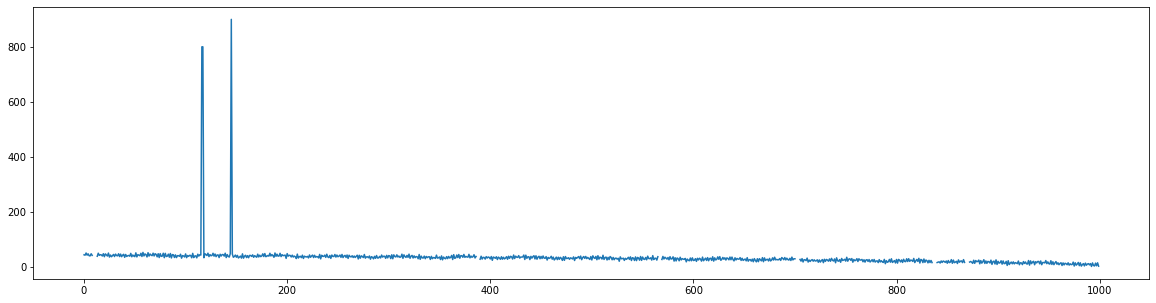

In [4]:
source_df['eaten_by_chupakabra'].plot(figsize=[20,5])

In [5]:
# Работа c NAN и выбросами

<AxesSubplot:>

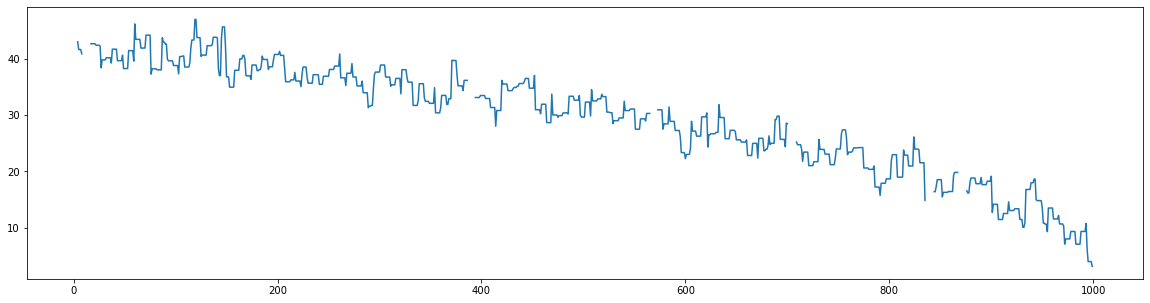

In [6]:
source_df.loc[:,'eaten_by_chupakabra'].rolling(window = 5).median().plot(figsize = [20,5])

In [7]:
source_df.loc[source_df['eaten_by_chupakabra']>100,:] = np.nan

In [9]:
source_df[source_df['eaten_by_chupakabra'].isna()]

,year,eaten_by_chupakabra
9,1009.0,NaN
10,1010.0,NaN
11,1011.0,NaN
12,1012.0,NaN
116,NaN,NaN
117,NaN,NaN
145,NaN,NaN
387,1387.0,NaN
388,1388.0,NaN
389,1389.0,NaN


<AxesSubplot:>

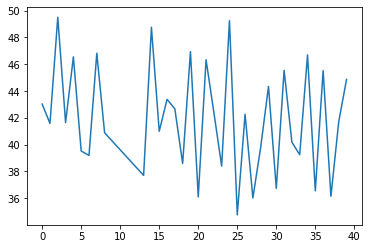

In [13]:
source_df['eaten_by_chupakabra'].interpolate(limit=10,limit_direction = 'forward',method='pad')[:40].plot()

<AxesSubplot:>

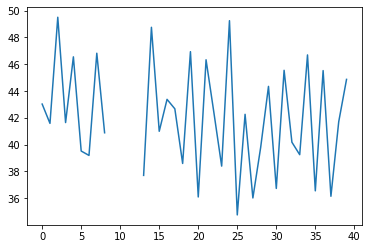

In [14]:
source_df['eaten_by_chupakabra'][:40].plot()

In [15]:
source_df.loc[:,'eaten_by_chupakabra'] = source_df.loc[:,'eaten_by_chupakabra'].interpolate(limit=10,limit_direction = 'forward',method='pad')

In [ ]:
# Проверить стационарность

In [16]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y,maxlag = lags, autolag=None)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

C:\Anaconda3\envs\ml-course\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


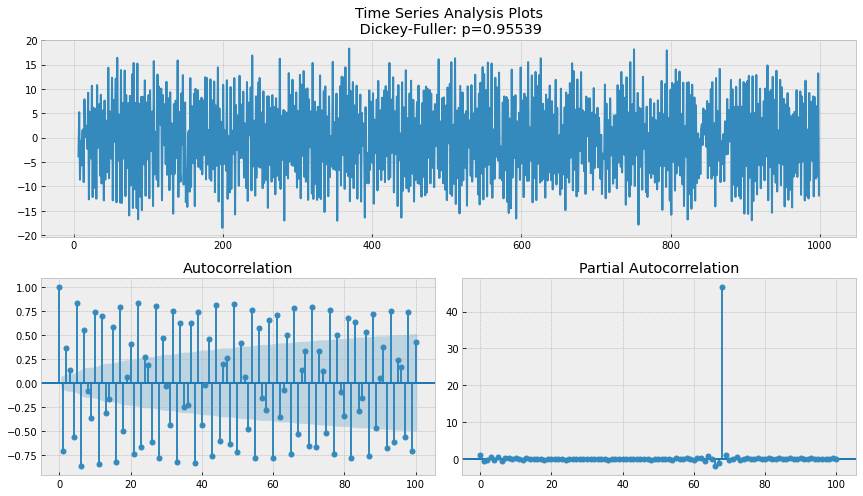

In [18]:
tsplot((source_df['eaten_by_chupakabra']-source_df['eaten_by_chupakabra'].shift(6)).dropna(),lags = 100)
#source_df['eaten_by_chupakabra'] = source_df['eaten_by_chupakabra']-source_df['eaten_by_chupakabra'].shift(6)

In [19]:
for i in range(1,40):
    source_df['lag_{}'.format(i)]=source_df['eaten_by_chupakabra'].shift(i)
source_df

,year,eaten_by_chupakabra,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_30,lag_31,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39
0,1000.0,43.022603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001.0,41.582718,43.022603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002.0,49.499442,41.582718,43.022603,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003.0,41.643290,49.499442,41.582718,43.022603,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004.0,46.545235,41.643290,49.499442,41.582718,43.022603,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,9.328030,5.059241,...,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025,18.423188,13.485313
996,1996.0,12.643640,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,9.328030,...,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025,18.423188
997,1997.0,3.106787,12.643640,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,...,10.654454,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025
998,1998.0,13.806012,3.106787,12.643640,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,...,6.872286,10.654454,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852


In [20]:
source_df.dropna(inplace=True)
source_df

,year,eaten_by_chupakabra,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_30,lag_31,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39
39,1039.0,44.863987,41.704776,36.144433,45.519768,36.550941,46.688096,39.246700,40.178052,45.540936,...,40.881368,40.881368,46.815038,39.191977,39.519717,46.545235,41.643290,49.499442,41.582718,43.022603
40,1040.0,33.817476,44.863987,41.704776,36.144433,45.519768,36.550941,46.688096,39.246700,40.178052,...,40.881368,40.881368,40.881368,46.815038,39.191977,39.519717,46.545235,41.643290,49.499442,41.582718
41,1041.0,44.171514,33.817476,44.863987,41.704776,36.144433,45.519768,36.550941,46.688096,39.246700,...,40.881368,40.881368,40.881368,40.881368,46.815038,39.191977,39.519717,46.545235,41.643290,49.499442
42,1042.0,36.894779,44.171514,33.817476,44.863987,41.704776,36.144433,45.519768,36.550941,46.688096,...,40.881368,40.881368,40.881368,40.881368,40.881368,46.815038,39.191977,39.519717,46.545235,41.643290
43,1043.0,39.663053,36.894779,44.171514,33.817476,44.863987,41.704776,36.144433,45.519768,36.550941,...,37.702664,40.881368,40.881368,40.881368,40.881368,40.881368,46.815038,39.191977,39.519717,46.545235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,9.328030,5.059241,...,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025,18.423188,13.485313
996,1996.0,12.643640,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,9.328030,...,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025,18.423188
997,1997.0,3.106787,12.643640,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,...,10.654454,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025
998,1998.0,13.806012,3.106787,12.643640,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,...,6.872286,10.654454,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852


In [22]:
def timeseries_train_test_split(X, y, test_size):
    """
        Простое разделение train-test, test - последние test_size*100% значений ряда
    """
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index-1]
    y_train = y.iloc[:test_index-1]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [23]:
train_columns = [x for x in source_df.columns if 'lag' in x]
X_train,X_test,y_train,y_test = timeseries_train_test_split(source_df[train_columns], source_df['eaten_by_chupakabra'], 0.25)

In [24]:
X_test

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_30,lag_31,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39
760,21.348105,25.927039,16.104220,29.281375,22.964960,28.430432,27.369600,19.749041,33.947608,20.104031,...,19.194839,26.702999,14.414924,25.672967,21.717551,16.401066,24.309170,15.938704,24.788565,21.014372
761,23.414953,21.348105,25.927039,16.104220,29.281375,22.964960,28.430432,27.369600,19.749041,33.947608,...,26.062114,19.194839,26.702999,14.414924,25.672967,21.717551,16.401066,24.309170,15.938704,24.788565
762,28.904461,23.414953,21.348105,25.927039,16.104220,29.281375,22.964960,28.430432,27.369600,19.749041,...,23.900224,26.062114,19.194839,26.702999,14.414924,25.672967,21.717551,16.401066,24.309170,15.938704
763,18.611533,28.904461,23.414953,21.348105,25.927039,16.104220,29.281375,22.964960,28.430432,27.369600,...,19.705551,23.900224,26.062114,19.194839,26.702999,14.414924,25.672967,21.717551,16.401066,24.309170
764,28.600211,18.611533,28.904461,23.414953,21.348105,25.927039,16.104220,29.281375,22.964960,28.430432,...,27.894005,19.705551,23.900224,26.062114,19.194839,26.702999,14.414924,25.672967,21.717551,16.401066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,9.328030,5.059241,12.650004,2.576420,...,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025,18.423188,13.485313
996,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,9.328030,5.059241,12.650004,...,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025,18.423188
997,12.643640,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,9.328030,5.059241,...,10.654454,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852,8.716025
998,3.106787,12.643640,2.362395,3.976892,13.431138,0.606206,11.054415,6.184919,10.753590,9.328030,...,6.872286,10.654454,12.162924,6.060924,13.473298,4.112661,14.091048,11.538851,6.885278,14.044852


## Метрики качества прогноза


- [R squared](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination), коэффициент детерминации (в эконометрике - доля объясненной моделью дисперсии), $(-\infty, 1]$

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ 

```python
sklearn.metrics.r2_score
```
---
- [Mean Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error), интерпретируемая метрика, измеряется в тех же единицах, что и исходный ряд, $[0, +\infty)$

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error), также интерпретируемая метрика, преимущество - малая чувствительность к выбросам в данных, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Mean Squared Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), используется в большинстве случаев, сильнее наказывает модель за большие ошибки и меньше - за маленькие (парабола), $[0, +\infty)$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- Mean Absolute Percentage Error, как MAE, только в процентах, $[0, +\infty)$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def plotModelResults(y_pred,y_test):
    plt.figure(figsize=(15, 7))
    plt.plot(y_pred, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)
    error = mean_absolute_percentage_error(y_pred, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

In [28]:
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300)
#model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


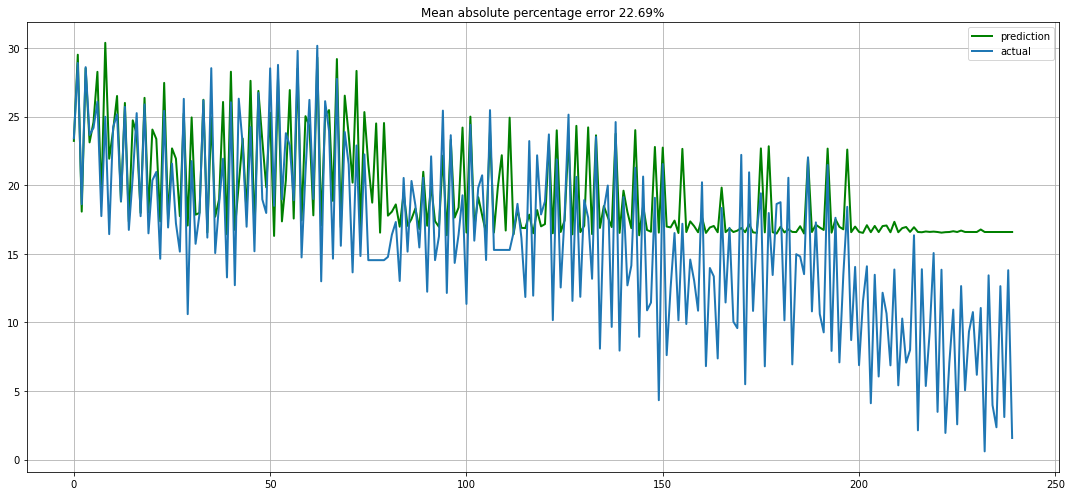

In [29]:
plotModelResults(y_pred, y_test.values)

In [36]:
for i in range (1,39):
    source_df['diff_{}'.format(i)] =source_df['lag_{}'.format(i)] -source_df['lag_{}'.format(i+1)]  
source_df.dropna(inplace = True)
train_columns = [x for x in source_df.columns if 'diff' in x]+['lag_1']
X_train,X_test,y_train,y_test = timeseries_train_test_split(source_df[train_columns],\
                                                            source_df['eaten_by_chupakabra']-source_df['lag_1'], 0.25)
X_train

,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10,...,diff_30,diff_31,diff_32,diff_33,diff_34,diff_35,diff_36,diff_37,diff_38,lag_1
39,5.560344,-9.375335,8.968827,-10.137155,7.441396,-0.931352,-5.362884,8.811826,-7.612634,4.542034,...,0.000000,-5.933670,7.623061,-0.327740,-7.025518,4.901945,-7.856152,7.916725,-1.439886,41.704776
40,3.159211,5.560344,-9.375335,8.968827,-10.137155,7.441396,-0.931352,-5.362884,8.811826,-7.612634,...,0.000000,0.000000,-5.933670,7.623061,-0.327740,-7.025518,4.901945,-7.856152,7.916725,44.863987
41,-11.046511,3.159211,5.560344,-9.375335,8.968827,-10.137155,7.441396,-0.931352,-5.362884,8.811826,...,0.000000,0.000000,0.000000,-5.933670,7.623061,-0.327740,-7.025518,4.901945,-7.856152,33.817476
42,10.354039,-11.046511,3.159211,5.560344,-9.375335,8.968827,-10.137155,7.441396,-0.931352,-5.362884,...,0.000000,0.000000,0.000000,0.000000,-5.933670,7.623061,-0.327740,-7.025518,4.901945,44.171514
43,-7.276736,10.354039,-11.046511,3.159211,5.560344,-9.375335,8.968827,-10.137155,7.441396,-0.931352,...,-3.178704,0.000000,0.000000,0.000000,0.000000,-5.933670,7.623061,-0.327740,-7.025518,36.894779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,7.620559,-14.198567,13.843576,-6.525803,2.652348,1.696214,-7.366160,13.827812,-9.771067,5.839425,...,8.370466,-8.849861,3.774193,0.749794,-4.416777,4.948872,-5.663412,1.975368,4.634441,27.369600
755,1.060832,7.620559,-14.198567,13.843576,-6.525803,2.652348,1.696214,-7.366160,13.827812,-9.771067,...,-7.908104,8.370466,-8.849861,3.774193,0.749794,-4.416777,4.948872,-5.663412,1.975368,28.430432
756,-5.465473,1.060832,7.620559,-14.198567,13.843576,-6.525803,2.652348,1.696214,-7.366160,13.827812,...,5.316485,-7.908104,8.370466,-8.849861,3.774193,0.749794,-4.416777,4.948872,-5.663412,22.964960
757,6.316416,-5.465473,1.060832,7.620559,-14.198567,13.843576,-6.525803,2.652348,1.696214,-7.366160,...,3.955416,5.316485,-7.908104,8.370466,-8.849861,3.774193,0.749794,-4.416777,4.948872,29.281375


<AxesSubplot:>

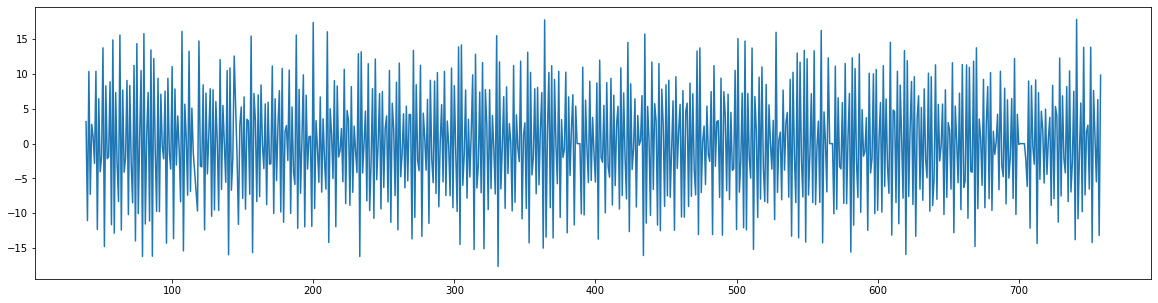

In [37]:
y_train.plot(figsize=[20,5])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300)
#model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

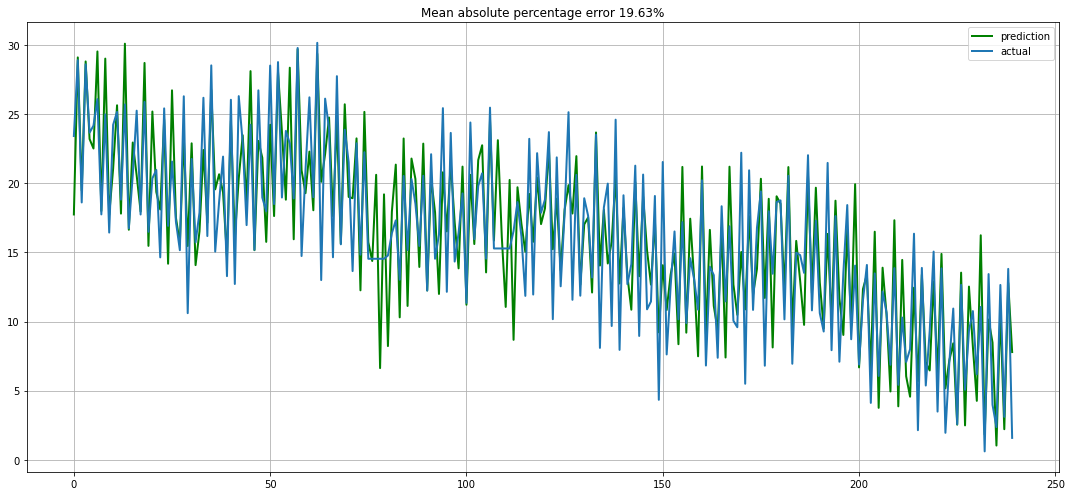

In [44]:
plotModelResults(y_pred+X_test['lag_1'].values,y_test.values+X_test['lag_1'].values)

In [ ]:
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [ ]:
plotCoefficients(model)